# 🐘🐘 Exploring Animal Traits with Data Science 🐘🐘

Authors: James Cleaver, Lauren McKnight, Maria Pettyjohn

> **Before you begin, click the 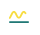 button in the tool bar above. This will open a version of the activity without visible code!**

In this activity you will
- use data to identify patterns and relationships in data, and draw conclusions, and
- explain how data is used by scientists to model and predict scientific phenomena.

Throughout the activity you will see emojis, including
- traffic lights 🚦, signalling you to stop and complete a task, and 
- ❗labelling important concepts.


You will be exploring a database of terrestrial (land-dwelling) animals curated by scientists with data science. Let's get started!

In [15]:
'''
This code is setting up a toolbox before starting the notebook.
Each line brings in a different tool that helps with working with data, numbers, and
creating visuals.

Here's what each tool does:

1. Pandas (pd) – This is like a super-powered spreadsheet.
                 It helps organize and analyze data in tables, similar to Excel.

2. NumPy (np) – This adds extra math abilities, especially for working with numbers
                and calculations.

3. SciPy Stats (stats) – This gives access to advanced statistics tools, useful for analyzing
                         patterns and trends in data.

4. Matplotlib (plt) – This is a basic drawing tool for making charts and graphs.

5. ipywidgets (widgets) – This adds interactive elements, like sliders or buttons, to make data
                          exploration more hands-on.

6. IPython Display – This helps show things clearly in a notebook-style environment, like
                     refreshing the screen or displaying results nicely.
            
'''

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact

layout = widgets.Layout(width='auto') #set width

In [2]:
'''
Whether data is generated in your own lab, shared by a collaborator, or accessed from a public database,
it needs to be brought into our notebook to be worked with. This is commonly done by loading a .csv file
just like you would use for excel.

For this activity, we work with a publically available data set of animal traits from https://animaltraits.org/. 
Once the file is opened, we read the file into a Pandas dataframe and take a look.

Here's what each line of code does:
1. Open the file
    This line opens the downloaded file and reads it into a format that the computer
    can work with. It uses the Pandas tool (from earlier) to turn the file into a table
    of data.

'''

df = pd.read_csv('observations.csv')

## First Look at the Animal Traits Data Set 

First, let's take a look at the Animal Traits data set in the form of a table.

In [3]:
'''
This code is setting up the data table to only include columns with data of interest for the rest of the notebook.

Here's what each line of code does:
1. Make a List of Column Names
    The first line creates a list called columns_to_include. This list contains the names of the columns 
    (like categories or traits) that we want to work with from a bigger dataset called df.

2. Pick Just Those Columns from the Dataset
    The second line takes only the columns listed in columns_to_include from the original dataset df. It 
    makes a copy of that smaller piece and stores it in a new variable called traits_df.

    Think of it like cutting out just the pages you need from a big book and making a photocopy of them.

3. Show the New Table
    The last line, display(traits_df), shows the new table (called a DataFrame) so you can see what it 
    looks like.
'''


# Listing the desired columns, including transformed versions
columns_to_include = ['phylum', 'class', 'order', 'family', 'genus', 'species', 'body mass', 'metabolic rate', 'brain size']

# Creating a copy of the subset with categorical columns
traits_df = df[columns_to_include].copy()

display(traits_df)

,phylum,class,order,family,genus,species,body mass,metabolic rate,brain size
0,Chordata,Amphibia,Anura,Hylidae,Hyla,Hyla versicolor,0.01315,NaN,0.000042
1,Chordata,Amphibia,Anura,Hylidae,Pseudacris,Pseudacris triseriata,0.00010,NaN,0.000002
2,Chordata,Amphibia,Anura,Hylidae,Acris,Acris crepitans,0.00030,NaN,0.000004
3,Chordata,Amphibia,Anura,Ceratobatrachidae,Platymantis,Platymantis vitiensis,0.00030,NaN,0.000005
4,Chordata,Amphibia,Anura,Ranidae,Rana,Rana sylvatica,0.00037,NaN,0.000009
...,...,...,...,...,...,...,...,...,...
3575,Chordata,Reptilia,Squamata,Sphaerodactylidae,Sphaerodactylus,Sphaerodactylus cinereus,0.00054,0.000252,NaN
3576,Chordata,Reptilia,Squamata,Sphaerodactylidae,Sphaerodactylus,Sphaerodactylus notatus,0.00033,0.000156,NaN
3577,Chordata,Reptilia,Squamata,Dactyloidae,Anolis,Anolis sagrei,0.00040,0.000391,NaN
3578,Chordata,Reptilia,Squamata,Eublepharidae,Coleonyx,Coleonyx switaki,0.00946,0.003889,NaN


You can see that this table contains a nine unique columns, corresponding to nine unique variables of interest. These variables take the form of:

- **Categorical Data**: Data in the form of alphanetical text labels, such as the **phylum**, **order**, or **family**.
- **Numerical Data:** Data in the form of numbers, including decimal numbers.
- **NaN:** "Not a Number" label that indicates that data is missing for that specific column and row of data.

The first six columns are biological classifications of each animal, in order of **phylum**, **class**, **order**, **family**, **genus**, and **species**. The science of naming and classifying animals is called taxonomy. The data provided in the Animal Traits table are part of the Linnaean System of classification, which is the main system of classification in Western Science. There are other methods of classification, such as different systems by First Nations peoples.

> 🚦 Copy and paste a species name into your favourite search engine. What animal is it? The latin names for animals are not always easy to guess the animal! For example, Macropus giganteus is a grey kangaroo.

In [19]:
def search_widget(species_name, known_name):
    print(f"You searched for {species_name}. You know this species by the name {known_name}.")


species_widget = widgets.Text(
    value="",
    description='Type species name from the Animal Traits Data table here.',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout = layout
)

known_widget = widgets.Text(
    value="",
    description='Type the name you know the species by here.',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout = layout
)

interact(search_widget, species_name=species_widget, known_name=known_widget)


interactive(children=(Text(value='', description='Type species name from the Animal Traits Data table here.', …

<function __main__.search_widget(species_name, known_name)>

The last three columns of the table are physical measurements of each animal's body mass, metabolic rate, and brain size in units of kilograms, energy per kilogram, and kilograms, respectively.

## Exploring the data visually - Single Variable

 Viewing the distributions of variables, and relationships between them, is best done visually. This is all part of "Exploratory Data Analysis".

Exploratory Data Analysis is an step-by-step and interactive process, often requiring you to go back and forth, adjusting your approach as you learn more about your data. The goal is to become familiar with the data, prepare it for further analysis, and possibly generate hypotheses to test.

Lets start by looking at the distribution of our most interesting variables.

In [22]:
def single_variable_plot_widget(variable_option, buckets_option):
    labels_list = {'body mass': 'Body Mass (kilograms)', 
              'brain size': 'Brain Size (kilograms)',
              'metabolic rate': 'Metabolic Rate (energy/kilogram)'}
    label = labels_list[variable_option]

    plt.hist(df[variable_option], bins=int(buckets_option))
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {label}")
    plt.show()

variable_widget = widgets.Dropdown(options=['body mass', 'brain size', 'metabolic rate'], 
                                   description='Choose a variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

buckets_widget = widgets.FloatText(value=20,
                                description='Enter the number of buckets to divide your data into:',
                                disabled=False,
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'},
                                   layout = layout)

widgets.interact(single_variable_plot_widget, variable_option=variable_widget, buckets_option=buckets_widget)

interactive(children=(Dropdown(description='Choose a variable to plot:', options=('body mass', 'brain size', '…

<function __main__.single_variable_plot_widget(variable_option, buckets_option)>

> 🚦 How does your choice of number of buckets change the distribution of data?

All the data are very squished to the left of the plot, indicating that data is very similar to eachother. For example, the brain size of most animals only fall in a small range of sizes.

The distribution of biological data you see here is common in the scientific field of biology.

> 🚦 Hypothesise why brain size data fall into a small range of possible brain sizes.

In [23]:
def brain_size_hypothesis(hypothesis):
    print(hypothesis)


hypo_widget = widgets.Text(
    value="",
    description='Type your hypothesis here (1-2 sentences):',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout = layout
)

widgets.interact(brain_size_hypothesis,hypothesis=hypo_widget)

interactive(children=(Text(value='', description='Type your hypothesis here (1-2 sentences):', layout=Layout(w…

<function __main__.brain_size_hypothesis(hypothesis)>

Right now, the x-axis of the plot increases in equal increments of 50 from 0 to 200. When an axis of a graph has evenly spaced increments, we call this **linear scaling** in data science.

As we hinted at before, biological data is often squished at the left-side of a plot that has **linear scaling**. For body mass, this means that there are lots of animal species with small mass bodies, some with medium mass bodies, and very few with large mass bodies.

> 🚦 Does this make sense to you when you think of the animals on Earth?

The **linear scaling** of the data makes it very difficult to compare the animal species with small mass bodies to the animals with large mass bodies. A way around this is to apply **logarithmic scaling** that makes it easier to compare things that are very different in size.

**Logarithmic scaling** changes the increments from being equal increments to increments of 1, 10, 100, 1000, and so on. Therefore, the increments on the x-axis increase by 10-times each increment from left to right.

>❗Usually, logarithmic increments are written as powers of 10 so that 10<sup>0</sup>=1, 10<sup>1</sup>=10, 10<sup>2</sup>=100, and so on, with decimal numbers taking the form of 10<sup>-1</sup>=0.1, 10<sup>-2</sup>=0.01, and so on. 

Lets see how that changes how your plot looks!

In [25]:
def single_variable_plot_log_widget(variable_option, buckets_option, scaling_option):
    labels_list = {'body mass': 'Body Mass (kilograms)', 
              'brain size': 'Brain Size (kilograms)',
              'metabolic rate': 'Metabolic Rate (energy/kilogram)'}
    
    label = labels_list[variable_option]
    
    if scaling_option == 'linear':
        plt.hist(df[variable_option], bins=int(buckets_option))
        plt.xlabel(label)
        plt.ylabel("Frequency")
        plt.title(f"Linear Distribution of {label}")
        plt.show()
    elif scaling_option == 'logarithmic':
        plt.hist(np.log10(df[variable_option]), bins=int(buckets_option))
        plt.xlabel(label+' in $10^x$')
        plt.ylabel("Frequency")
        plt.title(f"Logarithmic Distribution of {label} in $10^x$")
        plt.show()

variable_widget = widgets.Dropdown(options=['body mass', 'brain size', 'metabolic rate'], 
                                   description='Choose a variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

buckets_widget = widgets.FloatText(value=20,
                                description='Enter the number of buckets to divide your data into:',
                                disabled=False,
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'},
                                  layout=layout)
scaling_widget = widgets.Dropdown(options=['linear', 'logarithmic'], 
                                   description='Choose type of scaling:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

widgets.interact(single_variable_plot_log_widget, variable_option=variable_widget, buckets_option=buckets_widget, scaling_option=scaling_widget)

interactive(children=(Dropdown(description='Choose a variable to plot:', options=('body mass', 'brain size', '…

<function __main__.single_variable_plot_log_widget(variable_option, buckets_option, scaling_option)>

> 🚦 How has the distribution changed now that your have changed from linear scaling to logarithmic scaling? What patterns are you seeing?

In [26]:
def observations(obs):
    print(obs)


obs_widget = widgets.Text(
    value="",
    description='Type your observations here (1-2 sentences):',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout
)

widgets.interact(observations,obs=obs_widget)

interactive(children=(Text(value='', description='Type your observations here (1-2 sentences):', layout=Layout…

<function __main__.observations(obs)>

## Exploring Patterns in the Data - Two Variable

After single variable exploratory data analysis, two variable analysis is helpful for spotting relationships between variables!

Explore how the body mass, brain size, and metabolic rate variables are related to eachother in the dataset. 

In [27]:
def two_variable_plot_log_widget(variable_optionx, variable_optiony, scaling_option):
    plt.figure(figsize=(8, 5))
    labels_list = {'body mass': 'Body Mass (kilograms)', 
              'brain size': 'Brain Size (kilograms)',
              'metabolic rate': 'Metabolic Rate (energy/kilogram)'}
    
    labelx = labels_list[variable_optionx]
    labely = labels_list[variable_optiony]
    
    # Filter the DataFrame based on the selected variables
    filtered_df = df.dropna(subset=[variable_optionx, variable_optiony])

    # Ensure there are enough rows to plot
    if filtered_df.empty:
        print("No overlapping data available for the selected variables.")
    
    if scaling_option == 'linear':
        plt.plot(df[variable_optionx], df[variable_optiony], 'ko', markersize=5, alpha = 0.5)
        plt.xlabel(labelx)
        plt.ylabel(labely)
        plt.title(f"Two Variable Linear Distribution")
        plt.show()
    elif scaling_option == 'logarithmic':
        plt.plot(np.log10(df[variable_optionx]), np.log10(df[variable_optiony]), 'ko', markersize=5, alpha = 0.5)
        plt.xlabel(labelx+' in $10^x$')
        plt.ylabel(labely+' in $10^x$')
        plt.title(f"Two Variable Logarithmic Distribution in $10^x$")
        plt.show()

variable_widgetx = widgets.Dropdown(options=['body mass', 'brain size', 'metabolic rate'], 
                                   description='Choose x-axis variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

variable_widgety = widgets.Dropdown(options=['body mass', 'brain size', 'metabolic rate'], 
                                   description='Choose y-axis variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

scaling_widget = widgets.Dropdown(options=['linear', 'logarithmic'], 
                                   description='Choose type of scaling:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

widgets.interact(two_variable_plot_log_widget, variable_optionx=variable_widgetx, variable_optiony=variable_widgety, scaling_option=scaling_widget)

interactive(children=(Dropdown(description='Choose x-axis variable to plot:', options=('body mass', 'brain siz…

<function __main__.two_variable_plot_log_widget(variable_optionx, variable_optiony, scaling_option)>

>🚦Choose two variables for which you would like to explore their relationship.

In [30]:
def choose_widget(x_variable, y_variable):
    print(f"You choose to explore the relationship between {x_variable} and {y_variable}.")



x_widget = widgets.Dropdown(options=['body mass', 'brain size', 'metabolic rate'], 
                                   description='Select your choice of x-variable here:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'},
                                   layout=layout)

y_widget = widgets.Dropdown(options=['body mass', 'brain size', 'metabolic rate'], 
                                   description='Select your choice of y-variable here:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'},
                           layout=layout)

widgets.interact(choose_widget, x_variable=x_widget, y_variable=y_widget)

interactive(children=(Dropdown(description='Select your choice of x-variable here:', layout=Layout(width='auto…

<function __main__.choose_widget(x_variable, y_variable)>

>🚦What pattern are you observing between the two variables you chose?

In [32]:
def observations(obs):
    print(obs)


obs_widget = widgets.Text(
    value="",
    description='Describe the pattern you observe here (1-2 sentences):',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout
)

widgets.interact(observations,obs=obs_widget)

interactive(children=(Text(value='', description='Describe the pattern you observe here (1-2 sentences):', lay…

<function __main__.observations(obs)>

## Making Predictions with Modelling

You have observed patterns in the date by eye, so the next step is to test the patterns you observed using a model.

> ❗Models are used by data scientists to test the relationships between variables of observed data. If the model fits the data well, it can be used to make predictions related to the relationship tested.

For example, if we observed a linear relationship between two variables, say body mass and brain size, we can test that relationship with a **linear model**. A **linear model** is a straight line. 

If a **linear model** fits the body mass and brain size relationship well, you can use the model to predict the brain size of an animal given its body size using the model!

> ❗The **independent variable** is on the x-axis and the **dependent variable** is on the y-axis. You can use a model to predict how the **dependent variable** responds to changes in the **independent variable**. 


Let's test the relationship of your two variables using a **linear model**!

In [39]:
def linear_model_widget(variable_optionx, variable_optiony, scaling_option,x_pred):
    plt.figure(figsize=(8, 5))
    labels_list = {'body mass': 'Body Mass (kilograms)', 
              'brain size': 'Brain Size (kilograms)',
              'metabolic rate': 'Metabolic Rate (energy/kilogram)'}
    
    labelx = labels_list[variable_optionx]
    labely = labels_list[variable_optiony]
    
    # Filter the DataFrame based on the selected variables
    filtered_df = df.dropna(subset=[variable_optionx, variable_optiony])
    
    # Ensure the selected variables exist and have enough data points
    if filtered_df.empty:
        print("No data available for the selected variables.")
    elif filtered_df.shape[0] < 2:
        print("Not enough data points to perform regression.")
    else:
        if scaling_option == 'linear':
            # Perform linear regression using scipy
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                filtered_df[variable_optionx], filtered_df[variable_optiony]
            )
            x_linspace = np.linspace(min(filtered_df[variable_optionx]), max(filtered_df[variable_optionx]),100)
            
            plt.plot(df[variable_optionx], df[variable_optiony], 'ko', markersize=5, alpha = 0.5)
            plt.plot(x_linspace, x_linspace*slope + intercept, 'r')
            plt.xlabel(labelx)
            plt.ylabel(labely)
            plt.title(f"Two Variable Linear Distribution")
            
            print(f'For your chosen {labelx} a linear model predicts a {labely} of', x_pred*slope+intercept,".")
            
            plt.show()
            
        elif scaling_option == 'logarithmic':
            # Perform linear regression using scipy
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                np.log10(filtered_df[variable_optionx]), np.log10(filtered_df[variable_optiony])
            )
            x_linspace = np.linspace(min(np.log10(filtered_df[variable_optionx])), max(np.log10(filtered_df[variable_optionx])),100)
            
            plt.plot(np.log10(filtered_df[variable_optionx]), np.log10(filtered_df[variable_optiony]), 'ko', markersize=5, alpha = 0.5)
            plt.plot(x_linspace, x_linspace*slope + intercept, 'r')
            plt.xlabel(labelx+' in $10^x$')
            plt.ylabel(labely+' in $10^x$')
            plt.title(f"Two Variable Logarithmic Distribution in $10^x$")
            
            x_10pred = np.log10(x_pred)
            print(f'For your chosen {labelx} a linear model predicts a {labely} of', 10**(x_10pred*slope+intercept),".")

            plt.show()

        # Show the plot
        plt.show()
        return 

variable_widgetx = widgets.Dropdown(options=['body mass', 'brain size', 'metabolic rate'], 
                                   description='Choose x-axis variable to plot:',
                                    align_items='stretch', 
                                    style= {'description_width': 'initial'})

variable_widgety = widgets.Dropdown(options=['body mass', 'brain size', 'metabolic rate'], 
                                   description='Choose y-axis variable to plot:',
                                    align_items='stretch', 
                                    style= {'description_width': 'initial'})

scaling_widget = widgets.Dropdown(options=['linear', 'logarithmic'], 
                                   description='Choose type of scaling:',
                                   align_items='stretch', 
                                   style= {'description_width': 'initial'})

prediction_widget = widgets.FloatText(
    value=0,
    description=f'Make a Prediction! Type a x-value here:',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout
)


widgets.interact(linear_model_widget, variable_optionx=variable_widgetx, variable_optiony=variable_widgety, 
                 scaling_option=scaling_widget,x_pred=prediction_widget)


interactive(children=(Dropdown(description='Choose x-axis variable to plot:', options=('body mass', 'brain siz…

<function __main__.linear_model_widget(variable_optionx, variable_optiony, scaling_option, x_pred)>

> 🚦Does the linear model fit the relationship well? Check this by predicting a few values of your y-axis (dependent) variable given your x-axis (independent) variable.

In [40]:
def observations(obs):
    print(obs)


obs_widget = widgets.Text(
    value="",
    description='Type your observations here (1-2 sentences):',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout
)

widgets.interact(observations,obs=obs_widget)

interactive(children=(Text(value='', description='Type your observations here (1-2 sentences):', layout=Layout…

<function __main__.observations(obs)>

### All Done!

Congratulations, you just learned the fundamentals of data science, including exploratory data analysis and modelling.

If you need to hand in this notebook, go to 

File --> Save and Export Notebook As --> PDF

in the top-left corner of this page. 